<a href="https://colab.research.google.com/github/Petrichoeur/TER/blob/master/utilitaires/Traitement_donnees_theophile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traitement des données Theophile

---

Théophile est un petit garçon français né le 04 juillet 2005. Son père est cadre supérieur dans une entreprise et sa mère est violoniste. Il est bricoleur, curieux et constamment en quête de nouvelles expériences. Au moment des premiers enregistrements, Théophile était encore enfant unique.

Aliyah Morgenstern a commencé à le filmer alors qu’il n’avait que sept mois et elle continue actuellement à se rendre régulièrement chez lui afin de collecter des enregistrements en situation naturelle. Son corpus longitudinal montre que le développement langagier de Théophile n’est pas rapide. En effet, à 2;01 son répertoire lexical est restreint et prend souvent la forme de réduplications onomatopéiques. Toutefois son langage présente déjà quelques marques morphologiques comme celle du participe passé : « boum » et « boumé » pour « tombe » et « tombé ». Si au début du corpus, son langage se développait plus lentement que celui de Madeleine ou Léonard, à 5 ans, il est devenu un grand bavard plein d’humour qui aime raconter des histoires et faire des blagues et aime jouer avec son petit frère de deux ans son cadet et sa toute petite soeur.

# Nettoyage 

## Chargement des données

Récupèrer la liste des noms de fichier pour Theophile :
* Ces fichiers sont placés dans un repertoire 'data/theophile_texte'
* Ils sont issuent d'une extraction sur le site colaje au format chat
* Nous les avons transformés en format .txt afin de pouvoir les traiter avec python

In [1]:
import os 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import chardet

In [2]:
#print(os.getcwd())
#os.chdir('/Users/marine/Desktop/Projet_TER/data/theophile_texte')
#listing=os.listdir() # On crée une liste de tout les noms des fichiers

In [3]:
#listing.sort()
#listing

In [4]:
#del listing[0] # pour retirer '.DS_Store'
#len(listing)

Nous avons 39 fichiers pour Theophile, chacun de ses fichiers corresepondent aux retrancriptions d'un enregistrement vidéo.


## Lecture des données

* Définir le nom des colonnes selon le fichier final attendu
* Lire chaque fichier de la liste 
* Ajouter les colonnes nom de l'enfant et son age
* La colonne age identifie de manière unique l'enregistrement

In [0]:
d = {} # Le dictionnaire contenant les noms des fichiers
nom_col = ['type', 'seconde_debut', 'seconde_fin', 'contenu']
rows = 0 #Compteur de ligne pour vérifier la perte de données

for file in listing: 
    d[file]=pd.read_csv(file, 
                        sep = '\t', 
                        names = nom_col, 
                        header = None)  

    # On ajoute le nom de l'enfant
    nom_pos1 = 0
    nom_pos2 = file.find('-')
    nom = file[nom_pos1:nom_pos2]
    d[file]['enfant'] = nom
    
    # On ajoute l'age de l'enfant
    age_pos1 = file.find('_')-1
    age_pos2 = file.find('.')
    age = file[age_pos1:age_pos2]
    d[file]['age'] = age
    
    rows += len(d[file])
    
    
# DataFrame contenant toutes les lignes de l'enfant
data = pd.concat([d[file] for file in listing], 
                 sort=False,
                 ignore_index=True) 

In [5]:
#data.shape

## Vérification de la perte de données

On vérifie qu'il y a autant de ligne lu (variable rows) que de ligne écritent (len(data))

In [7]:
#print(rows == len(data))

True


## Ordre des colonnes

In [8]:
#data=data[['enfant', 'age','type', 'seconde_debut', 'seconde_fin', 'contenu']]
#data.head()

## Création du fichier final format csv

In [0]:
# Création du fichier enfant
os.chdir('/Users/marine/Desktop/Projet_TER/TER/data')
data.to_csv('data_theophile_final.csv',
           encoding = 'utf-8',
           sep = '\t',
           header = True)

On peut maintenant utiliser le fichier 'data_theophile_finale.csv' pour l'exploration de données.

## Lecture fichier final

In [10]:
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data')
data_theophile = pd.read_csv('data_theophile_final.csv',
                           sep = '\t',
                           encoding = 'utf-8',
                           index_col=False)

# On supprime la colonne qui duplique les index
data_theophile = data_theophile.drop(columns = 'Unnamed: 0')

In [11]:
#data_theophile

# Exploration des données

---

Qu'elles sont les différents type de ligne ?

In [0]:
print(len(data_theophile['type'].unique()))

40


Il existe 40 types de ligne dans les fichiers Theophile :

In [0]:
print(sorted(data_theophile['type'].unique()))

['+div+', '-div-', 'ADU', 'ANT', 'BRO', 'CAM', 'CAM2', 'CHI', 'FAT', 'FRI', 'GDF', 'GDM', 'GIR', 'MOT', 'OBS', 'SAR', 'STU', 'UNC', 'UNI', 'VIS', 'YON', 'act', 'add', 'alt', 'com', 'exp', 'fac', 'gpx', 'int', 'mod', 'pho', 'sit', 'xadr', 'ximi', 'xnpt', 'xpho', 'xpnt', 'xpnte', 'xpol', 'xpt']


### Valeurs NaN

In [14]:
#data_theophile.loc[data_theophile['contenu'].isna()]

Il existe une valeur NaN dans la colonne contenu, nous allons la supprimer :

In [13]:
data_theophile = data_theophile.dropna(subset=['type', 'contenu'])

## Les phonèmes

Les lignes de type 'pho' correspondent à la traduction phonétique lorsque Theophile s'exprime :
* Nous avons à disposition 15329 traductions pour Theophile
* On distingue les premiers mots de Theophile à l'age d'un an et 9 jours
* Les traductions s'arrêtent à l'age de 4 ans 11 mois et 11 jours

In [15]:
pho_theophile = data_theophile[data_theophile['type'] == 'pho']
#pho_theophile

In [0]:
#theo = data_theophile['type'].unique()
#theo.sort()
#type_theophile = {}
#for file in theo:
#    type_theophile[file] = len(data_theophile[data_theophile['type'] == file])
#type_theophile

Nous allons chercher à visualiser la quantité phonétique de données à disposition

## Visualisation des données phonétiques

### Ajout des colonnes 'année', 'mois' et 'jour'

On considère que la colonne age a pout format : x_xx_xx (année_mois_jour) ainsi :
* ``pho_theophile['age'][0:1]`` nous donne le nombre d'année
* ``pho_theophile['age'][2:4]`` nous donne le nombre de mois
* ``pho_theophile['age'][5:7]`` nous donne le nombre de jours

In [16]:
# Ajout du nombre d'année
année_pho_theophile = pho_theophile.apply(lambda row: row['age'][0:1], axis=1)
pho_theophile['année'] = année_pho_theophile

# Ajout du nombre de mois
mois_pho_theophile = pho_theophile.apply(lambda row: row['age'][2:4], axis=1)
pho_theophile['mois'] = mois_pho_theophile

# Ajout du nombre de jour
jour_pho_theophile = pho_theophile.apply(lambda row: row['age'][5:7], axis=1)
pho_theophile['jour'] = jour_pho_theophile

In [0]:
#pho_theophile

## Quantité de données

Combien avons-nous de ligne pour chaque année ? mois ? jour ?

### Quantité de données par année

In [17]:
nb_phrase_annee = pho_theophile[{'année','contenu'}].groupby('année').count()
nb_phrase_annee.rename(columns={'contenu': 'nb_phrase'})

,nb_phrase
année,
1,3100
2,5365
3,4301
4,2562


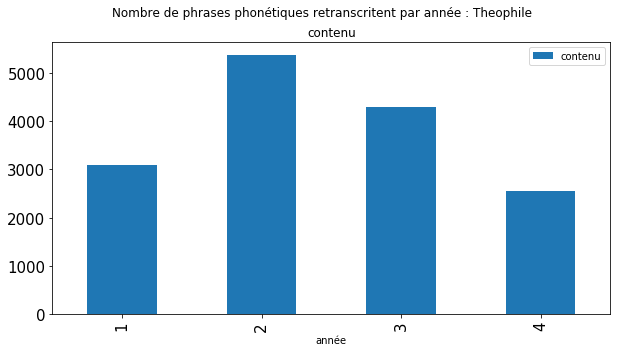

In [20]:
nb_phrase_annee.plot(kind='bar', 
                       subplots=True, 
                       figsize=(10,5),
                       title = 'Nombre de phrases phonétiques retranscritent par année : Theophile',
                       fontsize = 15,
                       use_index = True);

On note une croissance en cloche avec un pic de données phonétiques à l'age de 2 ans

### Quantité de données par mois

Regardons plus en détail la quantité de données phonétiques par mois :

In [21]:
nb_phrase_mois = pho_theophile[{'année','mois','contenu'}].groupby(['année','mois']).count()
nb_phrase_mois = nb_phrase_mois.rename(columns={'contenu': 'nb_phrase'})
#nb_phrase_mois.unstack(level=1)

On note qu'il y a des mois sans données, dès l'âge de 2 ans.<br>
Il manque :
* 3 enregistrements durant sa 2eme année et 3eme année,
* 7 enregistrements durant sa 4eme année.

Cela explique qu'il y ait moins de données phonétiques lorsque Théophile a 4 ans.

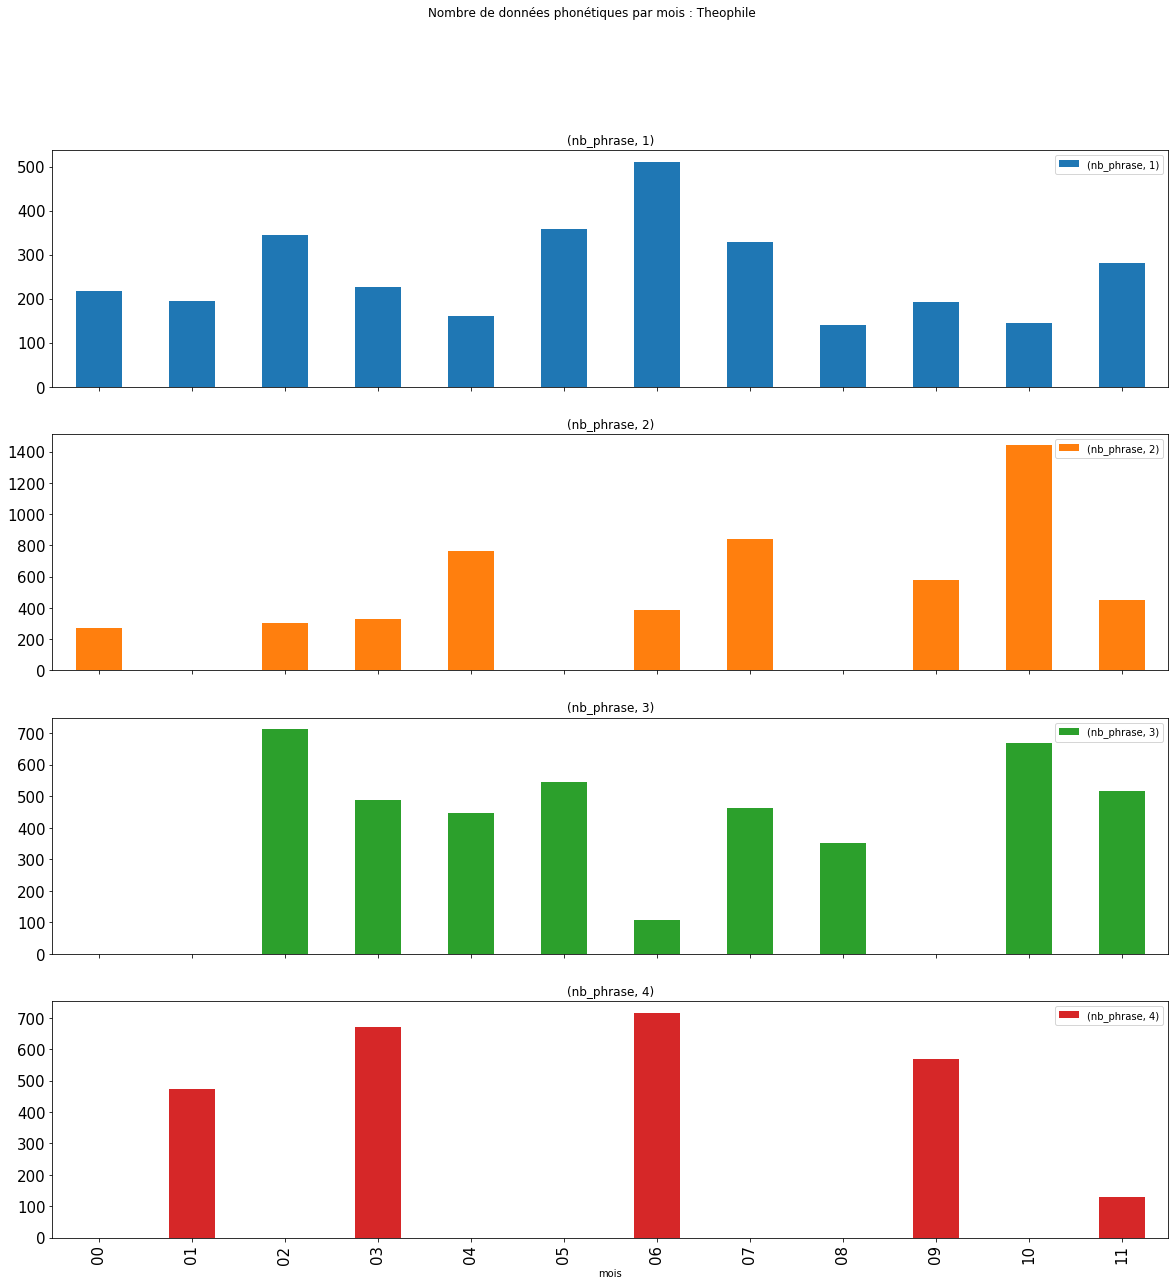

In [23]:
plt = nb_phrase_mois.unstack(level=0).plot(kind='bar', 
                                     subplots=True, 
                                     figsize=(20, 20),
                                     title = 'Nombre de données phonétiques par mois : Theophile',
                                     fontsize = 15,
                                     use_index = True)

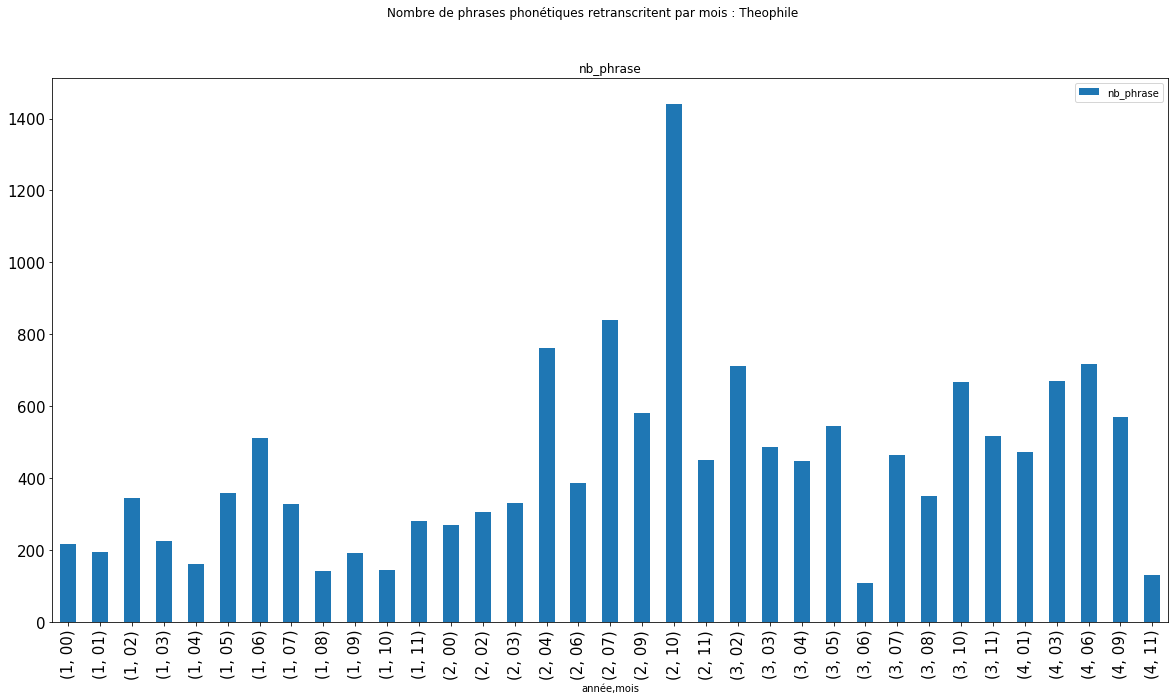

In [27]:
plt = nb_phrase_mois.plot(kind='bar',
                    subplots=True, 
                    figsize=(20, 10),
                    title = 'Nombre de phrases phonétiques retranscritent par mois : Theophile',
                    fontsize = 15,
                    use_index = True)

Cette visualisation regroupe toutes les informations commentées ci-dessus.<br>
On note tout de même que l'enregistrement lorsque Théophile a 2 ans et 10 mois se détache des autres par la quantité phonétique à qu'il possède.

### Quantité de données par jour

Regardons maintenant la quantité de données par jours :

In [25]:
nb_phrase_jour = pho_theophile[{'année','mois', 'jour', 'contenu'}].groupby(['année','mois', 'jour']).count()
nb_phrase_jour = nb_phrase_jour.rename(columns={'contenu': 'nb_phrase'})
#nb_phrase_jour

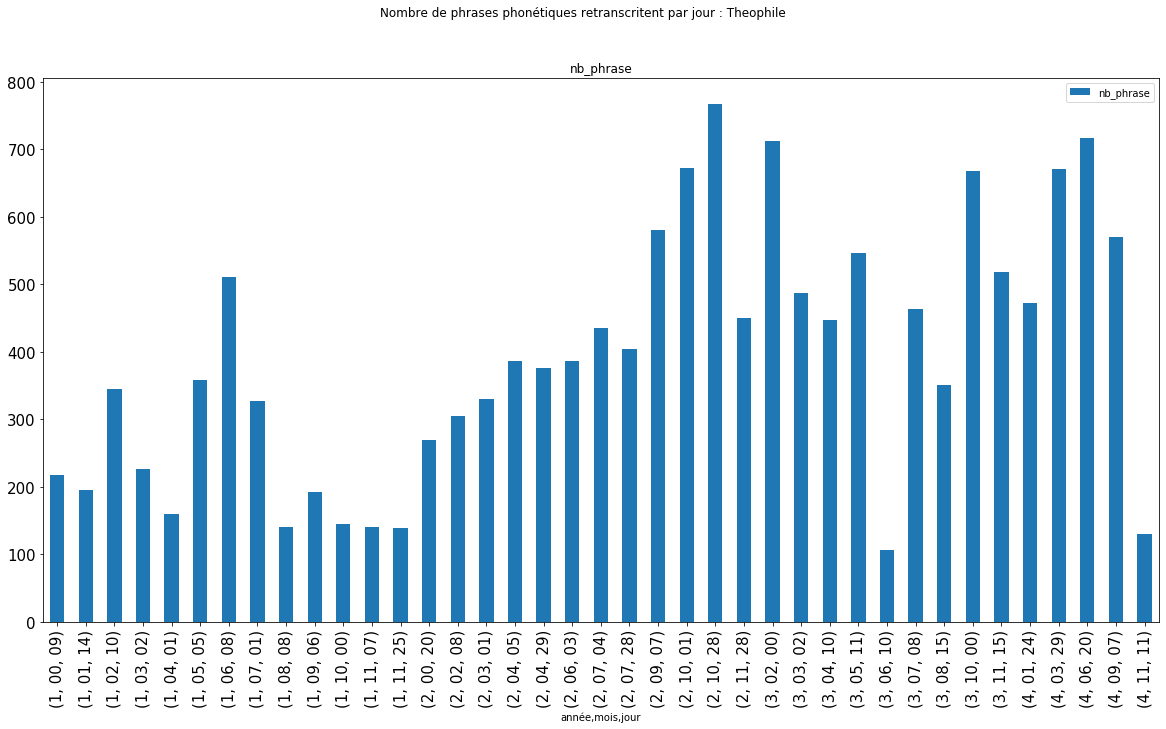

In [28]:
plt = nb_phrase_jour.plot(kind='bar',
                    subplots=True,
                    figsize=(20, 10),
                    title = 'Nombre de phrases phonétiques retranscritent par jour : Theophile',
                    fontsize = 15,
                    use_index = True)

Ici nous avons découpé les données de tel sorte à avoir la quantité de données pour chaque enregistrement de Theophile. Mais les donnnées ne sont pas distribué de manière équitable dans le temps. On peut mesurer la croissance du nombre de prise de parole (on pourrait croiser cette donnée avec la durée de l'enregistrement pour une meilleure mesure).

On a maintenant une meilleure vision du nombre de la quantité de données phonétiques à disposition et de leur répartition dans le temps pour Theophile.

## Nombre de mot
Nous allons chercher à explorer le nombre de mot au sens phonétique par phrase. <br>
Pour cela on peut compter le nombre d'espace dans la chaîne de caractère :

In [29]:
# Exemple 
pho = pho_theophile.at[108517, 'contenu']
print('Nombre de mot dans "' + pho + ' : '+ str(pho.count(' ')+1))

Nombre de mot dans "ananː na nː amaja : 4


Pour chaque ligne on calcul le nombre de mot phonétique :

In [30]:
nb_mot_pho = pho_theophile.apply(lambda row: row['contenu'].count(' ')+1, axis=1)
pho_theophile['nombre_mot_phonétique'] = nb_mot_pho #On ajoute une colonne contenant le nombre de mot

Par exemple on peut avoir la phrase de Theophile avec le plus grand nombre de mot :

In [31]:
pho_theophile.loc[pho_theophile['nombre_mot_phonétique'] == pho_theophile['nombre_mot_phonétique'].max()].contenu.values


array(['ty a ɑ̃vij dəpɥi ty pø fɛʁ tu skə ty vø ty pø fɛʁ vɛso ty χ ty pø d ɛtʁ ty va d ɛtʁ ty pø d ɛ ty pø ɛtʁ ty pø ɛtʁ tʁɑ̃sfɔʁme tɔ̃ bato twa'],
      dtype=object)

Voici la ligne de cette phrase :

In [32]:
pho_theophile.loc[pho_theophile['nombre_mot_phonétique'] == pho_theophile['nombre_mot_phonétique'].max()]

,enfant,age,type,seconde_debut,seconde_fin,contenu,année,mois,jour,nombre_mot_phonétique
105883,THEOPHILE,4_09_07,pho,NaN,NaN,ty a ɑ̃vij dəpɥi ty pø fɛʁ tu skə ty vø ty pø ...,4,09,07,39


### Espérance de mot par phrase

Il est intéressant d'observer le nombre de mot moyen que contient les phrases. C'est un indicateur qui peut nous aiguiller sur l'explosion du lexicale de l'enfant.

In [33]:
mean_nb_mot_pho_theophile_jour = pho_theophile[{'année', 'mois', 'jour', 'nombre_mot_phonétique'}].groupby(['année', 'mois', 'jour']).mean()
mean_nb_mot_pho_theophile_jour = mean_nb_mot_pho_theophile_jour.rename(columns={'nombre_mot_phonétique': 'espérance_nombre_de_mot_phonétique'})
#mean_nb_mot_pho_theophile_jour

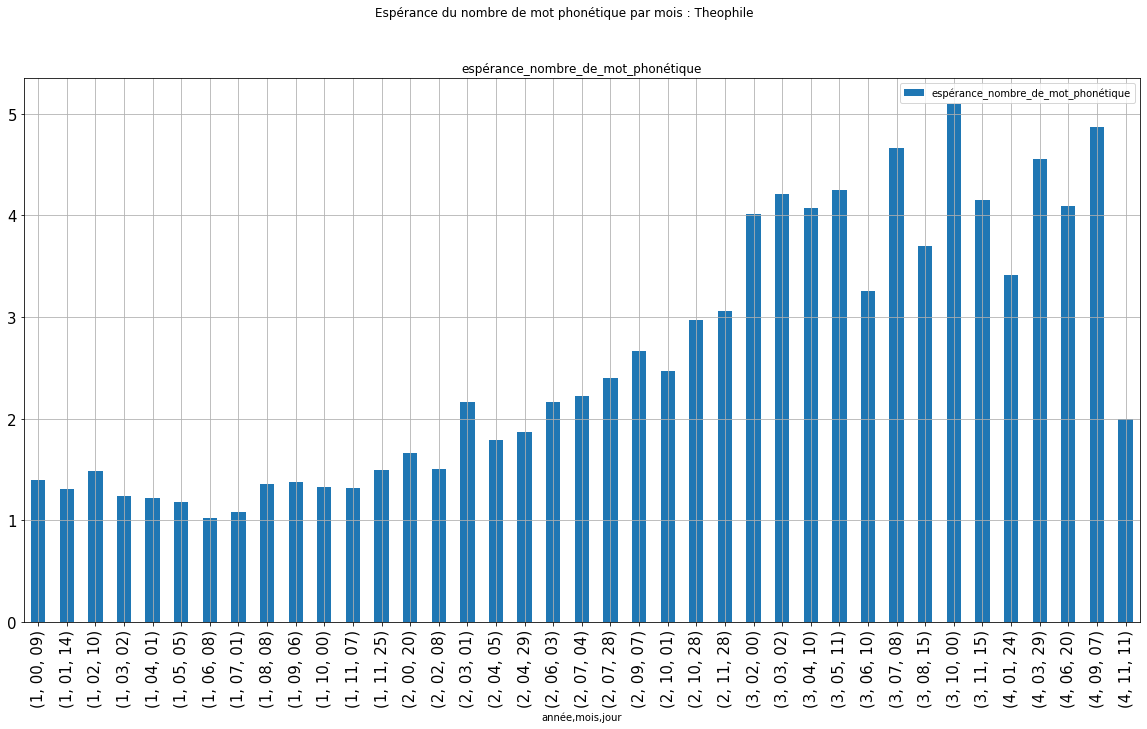

In [35]:
mean_nb_mot_pho_theophile_jour.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 10),
                            title = 'Espérance du nombre de mot phonétique par mois : Theophile',
                            fontsize = 15,
                            use_index = True,
                            grid=True);

On constaste que l'espérance a tendance à augmenter au fil du temps a partir du moment où Theophile a 1 an 6 mois et 8 jours.

### Variance du nombre de mot par phrase

In [36]:
var_nb_mot_pho_theophile = pho_theophile[{'année','mois','nombre_mot_phonétique'}].groupby(['année','mois']).var()
var_nb_mot_pho_theophile = var_nb_mot_pho_theophile.rename(columns={'nombre_mot_phonétique': 'variance'})
#var_nb_mot_pho_theophile.unstack(level=1)

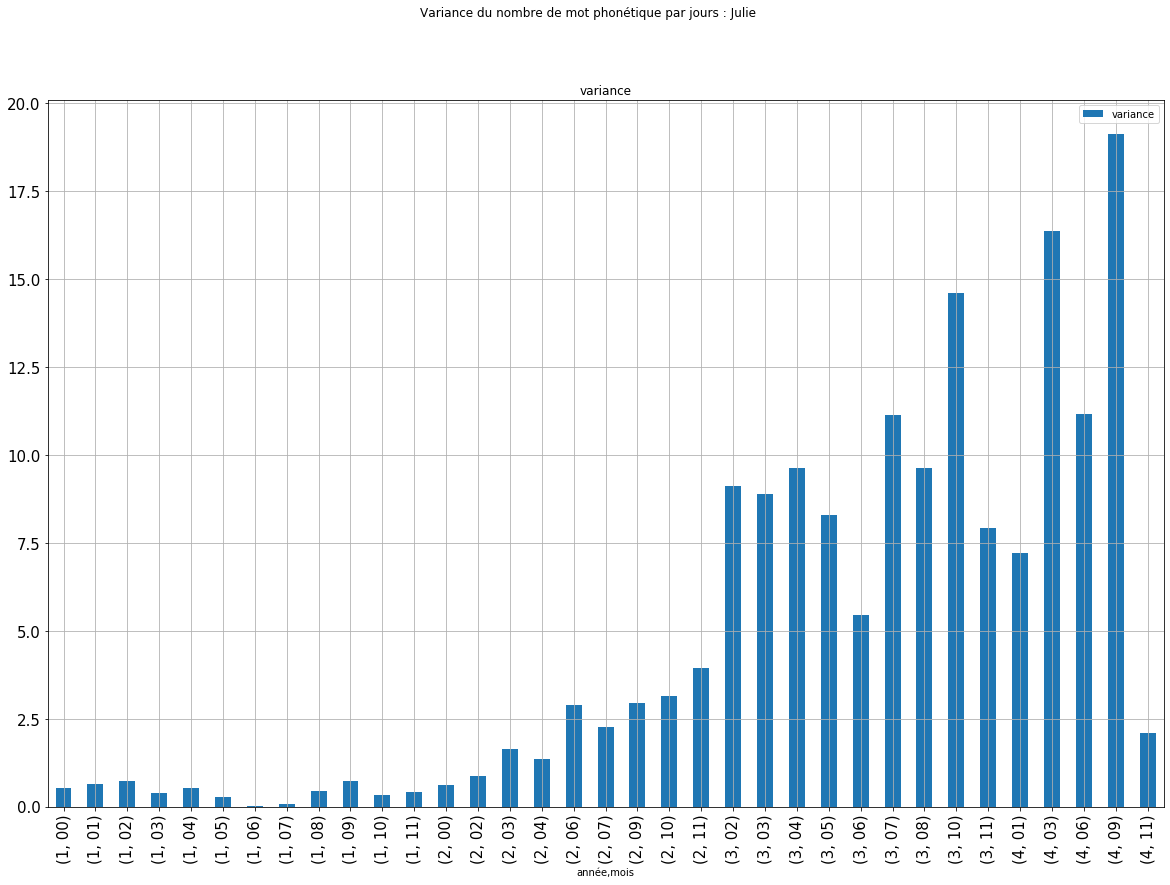

In [41]:
plt = var_nb_mot_pho_theophile.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 13),
                            title = 'Variance du nombre de mot phonétique par jours : Julie',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

### Plus grande phrase 

In [37]:
max_mot_pho_theophile = pho_theophile[{'année','mois','nombre_mot_phonétique'}].groupby(['année','mois']).max()
max_mot_pho_theophile = max_mot_pho_theophile.rename(columns={'nombre_mot_phonétique': 'longueur_max'})
#max_mot_pho_theophile.unstack(level=1)

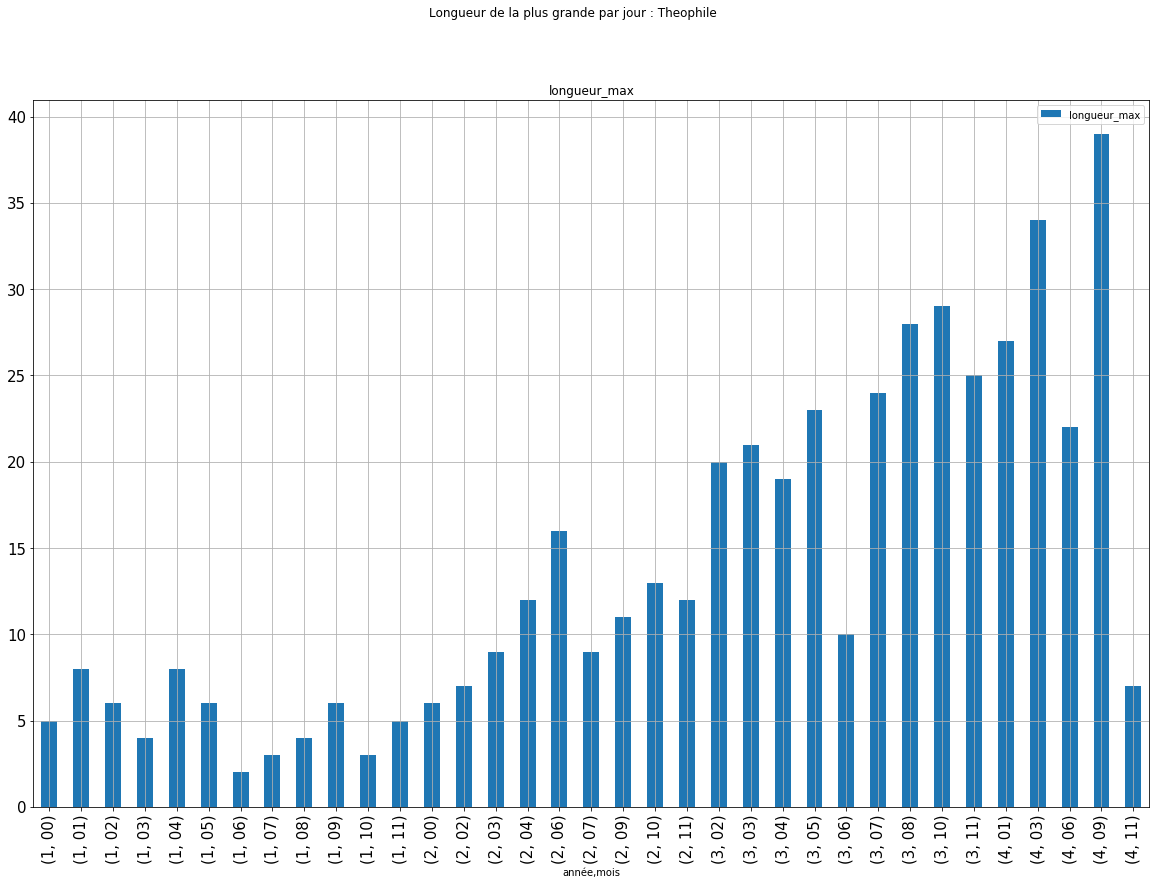

In [42]:
max_mot_pho_theophile.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 13),
                            title = 'Longueur de la plus grande par jour : Theophile',
                            fontsize = 15,
                            use_index = True,
                            grid=True);

On note une que la longueur de la plus longue phrase par enregistrement fluctue. <br>
Remarque: le fait que l'enfant effectue une longue prhase signifie pas forcement que celle-ci a un sens